# Regras de Associação
Objetivo: inferir regras de associação entre estados baseadas em plantas em comum, usando dados de plantas presentes nos Estados Unidos e no Canadá.


Preparando os dados:

In [1]:
from google.colab import drive
import pandas as pd
import csv

drive.mount("/content/drive")

all_lines = []

for i in open("/content/drive/MyDrive/Mineração de Dados/trabalho3_dados_Luciana.dat").readlines():
    line_data = []
    line = i.strip('\n').split(',')
    for j in range(len(line)):
      if j != 0:
        line_data.append(line[j])
    all_lines.append(line_data)

all_lines[0]


Mounted at /content/drive


['fl', 'nc']

Transformando os dados para poder operar com o algoritmo Apriori:

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

codifier = TransactionEncoder()
transactions_data = pd.DataFrame(codifier.fit(all_lines).transform(all_lines), columns=codifier.columns_)

transactions_data

,ab,ak,al,ar,az,bc,ca,co,ct,dc,...,tx,ut,va,vi,vt,wa,wi,wv,wy,yt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,True,True,True,True,True,False,...,False,True,True,False,True,True,True,True,True,True
2,False,True,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,True,True,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
23107,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
23108,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
23109,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Aplicando o Apriori:

(Usando min_support próximo de 0.2 os itemsets vão reduzindo, usei um valor que produzisse uma quantidade razoável)

In [ ]:
from mlxtend.frequent_patterns import apriori

itemsets = apriori(transactions_data, min_support=0.14, use_colnames=True)

itemsets

,support,itemsets
0,0.164640,(al)
1,0.193414,(az)
2,0.143828,(bc)
3,0.335079,(ca)
4,0.156938,(co)
5,0.192073,(fl)
6,0.171477,(ga)
7,0.150015,(id)
8,0.148155,(il)
9,0.147506,(la)


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(itemsets, metric="confidence", min_threshold=0.8)

rules.sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(al),(ga),0.164640,0.171477,0.142746,0.867017,5.056178,0.114514,6.230298
1,(ga),(al),0.171477,0.164640,0.142746,0.832450,5.056178,0.114514,4.985739
4,(nc),(va),0.171174,0.163039,0.140366,0.820020,5.029588,0.112458,4.650304
5,(va),(nc),0.163039,0.171174,0.140366,0.860934,5.029588,0.112458,5.959956
2,(nc),(ga),0.171174,0.171477,0.140280,0.819515,4.779158,0.110927,4.590529
3,(ga),(nc),0.171477,0.171174,0.140280,0.818067,4.779158,0.110927,4.555670
6,(wa),(or),0.167236,0.207347,0.147116,0.879690,4.242593,0.112440,6.588394


Observando as regras de associação encontradas:
al -> ga,
ga -> al,
nc -> va,
va -> nc,
nc -> ga,
ga -> nc,
wa -> or, e analisando os valores de confiança acima de 0.8 e lift próximo de 5, conclui-se que os seguintes estados são alguns dos que tem chances de ocorrência de plantas em comum: Alabama e Geórgia, Carolina do Norte e Virgínia, Carolina do Norte e Geórgia, Washington e Oregon.

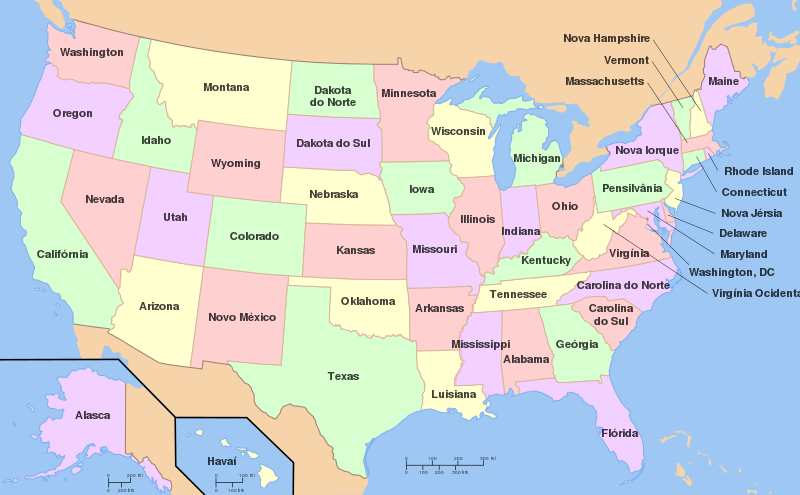

E essas regras fazem sentido, posto que são estados próximos.